In [104]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from scipy.stats import ttest_ind
from numpy import sqrt
sns.set(font_scale=1.5)
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier)
from sklearn.metrics import mean_squared_error
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
mpl.rcParams.update({'font.size': 16})
%matplotlib inline
from sklearn import (
    cluster, datasets, 
    decomposition, ensemble, manifold, 
    random_projection, preprocessing)
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

In [105]:
mental_df = pd.read_csv('data/mental_health.csv')
mental_df.head()
mental_df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [106]:
mental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 27 columns):
Timestamp                                                                                                               1260 non-null object
Age                                                                                                                     1260 non-null int64
Gender                                                                                                                  1260 non-null object
Country                                                                                                                 1260 non-null object
If you live in the United States, which state or territory do you live in?                                              744 non-null object
Are you self-employed?                                                                                                  1242 non-null object
Do you have a family history of mental illness?  

In [107]:
mental_df = mental_df.rename(columns={'Have you sought treatment for a mental health condition?': 'treatment', 'How many employees does your company or organization have?': 'size', 'Do you have a family history of mental illness?': 'history'})

In [108]:
mental_df.head()

,Timestamp,Age,Gender,Country,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,history,treatment,"If you have a mental health condition, do you feel that it interferes with your work?",size,Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,Do you know the options for mental health care your employer provides?,Has your employer ever discussed mental health as part of an employee wellness program?,Does your employer provide resources to learn more about mental health issues and how to seek help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,Any additional notes or comments
0,8/27/2014 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


mental_df['Gender'].unique

In [109]:
mental_df['Gender'] = mental_df['Gender'].replace('Male','M')
mental_df['Gender'] = mental_df['Gender'].replace('male','M')
mental_df['Gender'] = mental_df['Gender'].replace('m','M')
mental_df['Gender'] = mental_df['Gender'].replace('female','F')
mental_df['Gender'] = mental_df['Gender'].replace('Female','F')
mental_df['Gender'] = mental_df['Gender'].replace('f','F')
mental_df['Gender'] = mental_df['Gender'].replace('ostensibly male, unsure what that really means','M')
mental_df['Gender'] = mental_df['Gender'].replace('Cis Man','M')
mental_df['Gender'] = mental_df['Gender'].replace('Male-ish','M')
mental_df['Gender'] = mental_df['Gender'].replace('maile','M')
mental_df['Gender'] = mental_df['Gender'].replace('something kinda male','M')
mental_df['Gender'] = mental_df['Gender'].replace('Cis Male','M')
mental_df['Gender'] = mental_df['Gender'].replace('Mal','M')
mental_df['Gender'] = mental_df['Gender'].replace('Male (CIS)','M')
mental_df['Gender'] = mental_df['Gender'].replace('something kinda male?','M')
mental_df['Gender'] = mental_df['Gender'].replace('Make','M')
mental_df['Gender'] = mental_df['Gender'].replace('Guy (-ish) ^_^','M')
mental_df['Gender'] = mental_df['Gender'].replace('Male ','M')
mental_df['Gender'] = mental_df['Gender'].replace('Man','M')
mental_df['Gender'] = mental_df['Gender'].replace('msle','M')
mental_df['Gender'] = mental_df['Gender'].replace('Mail','M')
mental_df['Gender'] = mental_df['Gender'].replace('cis male','M')
mental_df['Gender'] = mental_df['Gender'].replace('Malr','M')
mental_df['Gender'] = mental_df['Gender'].replace('Cis Female','F')
mental_df['Gender'] = mental_df['Gender'].replace('Woman','F')
mental_df['Gender'] = mental_df['Gender'].replace('Female (cis)','F')
mental_df['Gender'] = mental_df['Gender'].replace('femail','F')
mental_df['Gender'] = mental_df['Gender'].replace('Female','F')
mental_df['Gender'] = mental_df['Gender'].replace('Femake','F')
mental_df['Gender'] = mental_df['Gender'].replace('woman','F')
mental_df['Gender'] = mental_df['Gender'].replace('cis-female/femme','F')


In [110]:
mask_M = mental_df["Gender"] == "M"
mask_F = mental_df["Gender"] == "F"
mask_mf = mask_M | mask_F
mental_gender = mental_df[mask_mf]

In [111]:
mental_gender = mental_gender[["Gender", "treatment"]]
mental_gender.head()

,Gender,treatment
0,F,Yes
1,M,No
2,M,No
3,M,Yes
4,M,No


In [112]:
mental_size = mental_df[['size','treatment']]
mental_size.head()

,size,treatment
0,6-25,Yes
1,More than 1000,No
2,6-25,No
3,26-100,Yes
4,100-500,No


In [113]:
mental_history = mental_df[['history','treatment']]
mental_history.head()

,history,treatment
0,No,Yes
1,No,No
2,No,No
3,Yes,Yes
4,No,No


In [114]:
mental_size['Mental_illness_yes'] = pd.Series(np.where(mental_size["treatment"] == "Yes",1,0), mental_size.index)
size_avg = mental_size.groupby('size').mean()
size_avg

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Mental_illness_yes
size,
1-5,0.561728
100-500,0.539773
26-100,0.519031
500-1000,0.442623
6-25,0.441379
More than 1000,0.517730


In [115]:
order = [1,4,3,5,2,6]
size_avg['order']=order
size_avg = size_avg.sort_values(['order'])
size_avg

,Mental_illness_yes,order
size,,
1-5,0.561728,1
6-25,0.441379,2
26-100,0.519031,3
100-500,0.539773,4
500-1000,0.442623,5
More than 1000,0.517730,6


In [116]:
sns.set(font_scale=2.0)

Text(0.5, 1.0, 'Occurance of Mental Illness by Company Size')

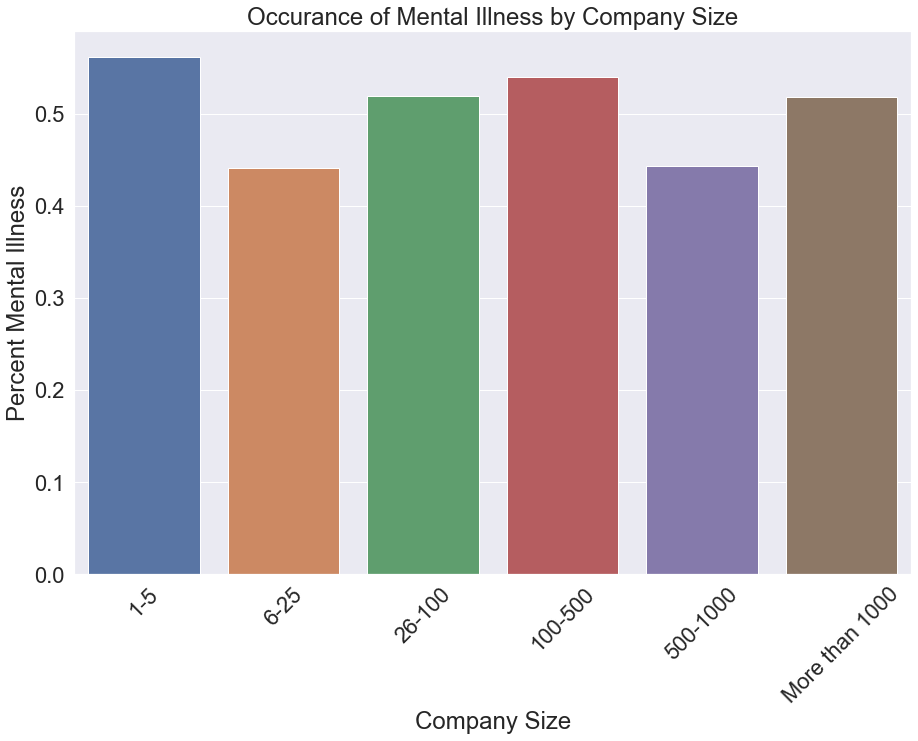

In [117]:
plt.figure(figsize=(15,10))
sns.barplot(x=size_avg.index.values, y=size_avg['Mental_illness_yes'])
plt.xticks(rotation= 45)
plt.xlabel('Company Size')
plt.ylabel('Percent Mental Illness')
plt.title('Occurance of Mental Illness by Company Size')

In [118]:
mental_history['Mental_illness_yes'] = pd.Series(np.where(mental_history["treatment"] == "Yes",1,0), mental_history.index)
history_avg = mental_history.groupby('history').mean()
history_avg

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Mental_illness_yes
history,
No,0.354167
Yes,0.741870


Text(0.5, 1.0, 'Occurance of Mental Illness Based on Family History of Mental Illness')

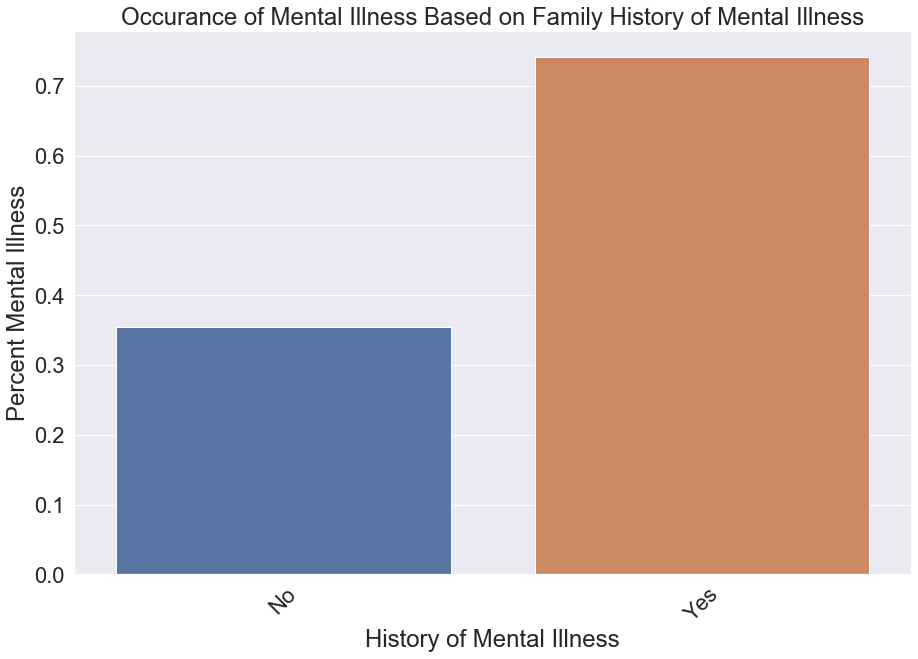

In [119]:
plt.figure(figsize=(15,10))
sns.barplot(x=history_avg.index.values, y=history_avg['Mental_illness_yes'])
plt.xticks(rotation= 45)
plt.xlabel('History of Mental Illness')
plt.ylabel('Percent Mental Illness')
plt.title('Occurance of Mental Illness Based on Family History of Mental Illness')

In [120]:
history_avg_t = mental_history.mean()
history_avg_t = history_avg_t.values.tolist()
history_avg_t = history_avg_t[0]
history_avg_t

0.5055555555555555

In [121]:
no_avg = history_avg.values.tolist()
no_avg = no_avg[0][0]
no_avg

0.3541666666666667

In [122]:
yes_avg = history_avg.values.tolist()
yes_avg = yes_avg[1][0]
yes_avg

0.741869918699187

In [123]:
no_sum = mental_history[mental_history['history']=='No'].count()
no_sum = no_sum['history']
no_sum

768

In [124]:
yes_sum = mental_history[mental_history['history']=='Yes'].count()
yes_sum = yes_sum['history']
yes_sum

492

In [125]:
se_his = sqrt(history_avg_t * (1 - history_avg_t) * (1 / no_sum + 1 / yes_sum))
z_his =(yes_avg-no_avg)/se_his
z_his

13.428705151898392

In [126]:
p_val_his = 1 - stats.norm.cdf(z_his)
p_val_his

0.0

In [127]:
mental_gender['Mental_illness_yes'] = pd.Series(np.where(mental_gender["treatment"] == "Yes",1,0), mental_gender.index)
gender_avg = mental_gender.groupby('Gender').mean()
gender_avg

,Mental_illness_yes
Gender,
F,0.689796
M,0.454271


Text(0.5, 1.0, 'Occurance of Mental Illness by Sex')

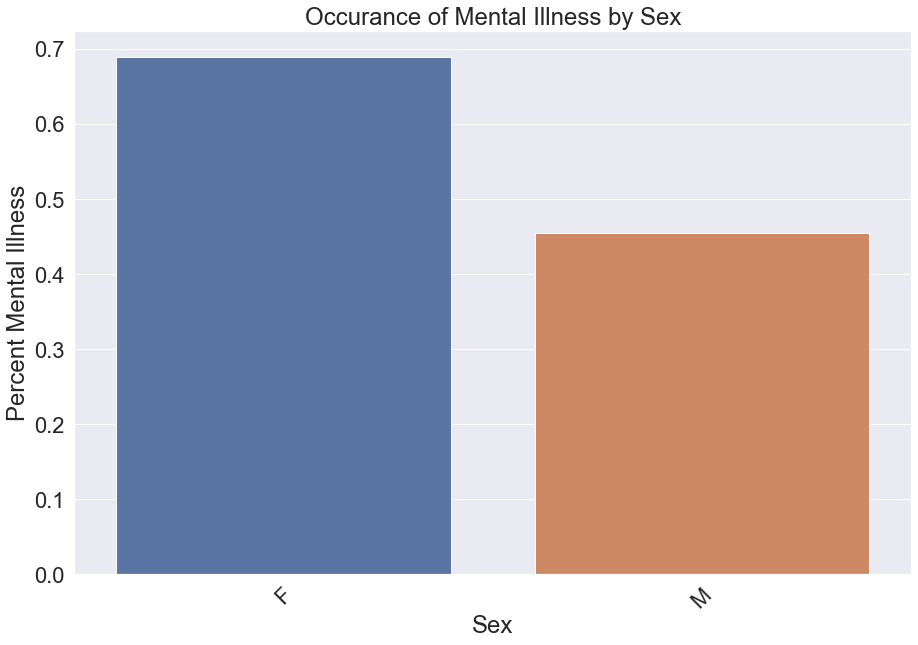

In [128]:
plt.figure(figsize=(15,10))
sns.barplot(x=gender_avg.index.values, y=gender_avg['Mental_illness_yes'])
plt.xticks(rotation= 45)
plt.xlabel('Sex')
plt.ylabel('Percent Mental Illness')
plt.title('Occurance of Mental Illness by Sex')

In [129]:
gender_avg_t = mental_gender.mean()
gender_avg_t = gender_avg_t.values.tolist()
gender_avg_t = gender_avg_t[0]
gender_avg_t

0.5008064516129033

In [130]:
fem_avg = gender_avg.values.tolist()
fem_avg = fem_avg[0][0]
fem_avg

0.689795918367347

In [131]:
male_avg = gender_avg.values.tolist()
male_avg = male_avg[1][0]
male_avg

0.4542713567839196

In [132]:
fem_sum = mental_gender[mental_gender['Gender']=='F'].count()
fem_sum = fem_sum['Gender']
fem_sum

245

In [133]:
male_sum = mental_gender[mental_gender['Gender']=='M'].count()
male_sum = male_sum['Gender']
male_sum

995

In [134]:
se_gen = sqrt(gender_avg_t * (1 - gender_avg_t) * (1 / fem_sum + 1 / male_sum))
z_gen =(fem_avg-male_avg)/se_gen
z_gen

6.604660593456575

In [135]:
p_val_gen = 1 - stats.norm.cdf(z_gen)
p_val_gen

1.992150888696642e-11

In [136]:
mental_df.head()


,Timestamp,Age,Gender,Country,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,history,treatment,"If you have a mental health condition, do you feel that it interferes with your work?",size,Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,Do you know the options for mental health care your employer provides?,Has your employer ever discussed mental health as part of an employee wellness program?,Does your employer provide resources to learn more about mental health issues and how to seek help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,Any additional notes or comments
0,8/27/2014 11:29:31,37,F,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29:44,32,M,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29:46,31,M,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30:22,31,M,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [137]:
mental_df.drop(columns=['Timestamp','If you live in the United States, which state or territory do you live in?'], inplace = True)

In [138]:
mental_df.drop(columns=['Any additional notes or comments'], inplace = True)

In [139]:
mental_df.replace({'No': 0, 'Yes': 1}, inplace = True)

In [140]:
mental_df.replace({"Don't know": 0, 'Not sure': 0}, inplace = True)

In [141]:
mental_df.replace({'Maybe': 0, 'Often': 1, 'Rarely': 0}, inplace = True)

In [142]:
mental_df.replace({'Never': 0}, inplace = True)

In [143]:
mental_df['Are you self-employed?'].fillna('0', inplace = True)

In [144]:
mental_df.head()

,Age,Gender,Country,Are you self-employed?,history,treatment,"If you have a mental health condition, do you feel that it interferes with your work?",size,Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,Do you know the options for mental health care your employer provides?,Has your employer ever discussed mental health as part of an employee wellness program?,Does your employer provide resources to learn more about mental health issues and how to seek help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
0,37,F,United States,0,0,1,1,6-25,0,1,1,0,0,1,1,Somewhat easy,0,0,Some of them,1,0,0,1,0
1,44,M,United States,0,0,0,0,More than 1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,32,M,Canada,0,0,0,0,6-25,0,1,0,0,0,0,0,Somewhat difficult,0,0,1,1,1,1,0,0
3,31,M,United Kingdom,0,1,1,1,26-100,0,1,0,1,0,0,0,Somewhat difficult,1,1,Some of them,0,0,0,0,1
4,31,M,United States,0,0,0,0,100-500,1,1,1,0,0,0,0,0,0,0,Some of them,1,1,1,0,0


In [145]:
mental_df['treatment'].sum()/len(mental_df)

0.5055555555555555

In [146]:
len(mental_df)

1260

In [147]:
mental_df['Are you self-employed?'].unique

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
1255    0
1256    0
1257    0
1258    0
1259    0
Name: Are you self-employed?, Length: 1260, dtype: object>

In [148]:
dummies = pd.get_dummies(mental_df['size'])

In [149]:
dummies.head()

,1-5,100-500,26-100,500-1000,6-25,More than 1000
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


In [150]:
mental_df['1-5'] = dummies['1-5']
mental_df['6-25'] = dummies['6-25']
mental_df['26-100'] = dummies['26-100']
mental_df['100-500'] = dummies['100-500']
mental_df['500-1000'] = dummies['500-1000']
mental_df['More than 1000'] = dummies['More than 1000']

In [151]:
mental_df.drop(['size'], axis=1, inplace=True)

In [152]:
mental_df.head()

,Age,Gender,Country,Are you self-employed?,history,treatment,"If you have a mental health condition, do you feel that it interferes with your work?",Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,Do you know the options for mental health care your employer provides?,Has your employer ever discussed mental health as part of an employee wellness program?,Does your employer provide resources to learn more about mental health issues and how to seek help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,1-5,6-25,26-100,100-500,500-1000,More than 1000
0,37,F,United States,0,0,1,1,0,1,1,0,0,1,1,Somewhat easy,0,0,Some of them,1,0,0,1,0,0,1,0,0,0,0
1,44,M,United States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,32,M,Canada,0,0,0,0,0,1,0,0,0,0,0,Somewhat difficult,0,0,1,1,1,1,0,0,0,1,0,0,0,0
3,31,M,United Kingdom,0,1,1,1,0,1,0,1,0,0,0,Somewhat difficult,1,1,Some of them,0,0,0,0,1,0,0,1,0,0,0
4,31,M,United States,0,0,0,0,1,1,1,0,0,0,0,0,0,0,Some of them,1,1,1,0,0,0,0,0,1,0,0


In [153]:
dummies = pd.get_dummies(mental_df['How easy is it for you to take medical leave for a mental health condition?'])

In [154]:
dummies.head()

,0,Somewhat difficult,Somewhat easy,Very difficult,Very easy
0,0,0,1,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [155]:
mental_df['How easy is it for you to take medical leave for a mental health condition? Somewhat Difficult'] = dummies['Somewhat difficult']
mental_df['How easy is it for you to take medical leave for a mental health condition? Somewhat Easy'] = dummies['Somewhat easy']
mental_df['How easy is it for you to take medical leave for a mental health condition? Very Difficult'] = dummies['Very difficult']
mental_df['How easy is it for you to take medical leave for a mental health condition? Very easy']= dummies['Very easy']
mental_df['How easy is it for you to take medical leave for a mental health condition? yes/no'] = dummies[0]

In [156]:
mental_df.head()

,Age,Gender,Country,Are you self-employed?,history,treatment,"If you have a mental health condition, do you feel that it interferes with your work?",Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,Do you know the options for mental health care your employer provides?,Has your employer ever discussed mental health as part of an employee wellness program?,Does your employer provide resources to learn more about mental health issues and how to seek help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,1-5,6-25,26-100,100-500,500-1000,More than 1000,How easy is it for you to take medical leave for a mental health condition? Somewhat Difficult,How easy is it for you to take medical leave for a mental health condition? Somewhat Easy,How easy is it for you to take medical leave for a mental health condition? Very Difficult,How easy is it for you to take medical leave for a mental health condition? Very easy,How easy is it for you to take medical leave for a mental health condition? yes/no
0,37,F,United States,0,0,1,1,0,1,1,0,0,1,1,Somewhat easy,0,0,Some of them,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
1,44,M,United States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,32,M,Canada,0,0,0,0,0,1,0,0,0,0,0,Somewhat difficult,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,31,M,United Kingdom,0,1,1,1,0,1,0,1,0,0,0,Somewhat difficult,1,1,Some of them,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,31,M,United States,0,0,0,0,1,1,1,0,0,0,0,0,0,0,Some of them,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [157]:
mental_df.drop(['How easy is it for you to take medical leave for a mental health condition?'], axis=1, inplace=True)

In [158]:
dummies = pd.get_dummies(mental_df['Would you be willing to discuss a mental health issue with your coworkers?'])

In [159]:
dummies.head()

,0,1,Some of them
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1


In [160]:
mental_df['Would you be willing to discuss a mental health issue with your coworkers? No'] = dummies[0]
mental_df['Would you be willing to discuss a mental health issue with your coworkers? Yes'] = dummies[1]
mental_df['Would you be willing to discuss a mental health issue with your coworkers? Some'] = dummies['Some of them']

In [161]:
mental_df.drop(['Would you be willing to discuss a mental health issue with your coworkers?'],axis=1,inplace=True)

In [162]:
mental_df.head()

,Age,Gender,Country,Are you self-employed?,history,treatment,"If you have a mental health condition, do you feel that it interferes with your work?",Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,Do you know the options for mental health care your employer provides?,Has your employer ever discussed mental health as part of an employee wellness program?,Does your employer provide resources to learn more about mental health issues and how to seek help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,1-5,6-25,26-100,100-500,500-1000,More than 1000,How easy is it for you to take medical leave for a mental health condition? Somewhat Difficult,How easy is it for you to take medical leave for a mental health condition? Somewhat Easy,How easy is it for you to take medical leave for a mental health condition? Very Difficult,How easy is it for you to take medical leave for a mental health condition? Very easy,How easy is it for you to take medical leave for a mental health condition? yes/no,Would you be willing to discuss a mental health issue with your coworkers? No,Would you be willing to discuss a mental health issue with your coworkers? Yes,Would you be willing to discuss a mental health issue with your coworkers? Some
0,37,F,United States,0,0,1,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,44,M,United States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,32,M,Canada,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,31,M,United Kingdom,0,1,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,31,M,United States,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [163]:
mental_df['Gender'].unique()

array(['F', 'M', 'Trans-female', 'queer/she/they', 'non-binary', 'Nah',
       'All', 'Enby', 'fluid', 'Genderqueer', 'Female ', 'Androgyne',
       'Agender', 'male leaning androgynous', 'Trans woman', 'Neuter',
       'Female (trans)', 'queer', 'A little about you', 'p'], dtype=object)

In [164]:
mental_df['Gender'] = mental_df['Gender'].replace('Trans-female','F')
mental_df['Gender'] = mental_df['Gender'].replace('queer/she/they','F')
mental_df['Gender'] = mental_df['Gender'].replace('nah','non-binary')
mental_df['Gender'] = mental_df['Gender'].replace('All','non-binary')
mental_df['Gender'] = mental_df['Gender'].replace('fluid','non-binary')
mental_df['Gender'] = mental_df['Gender'].replace('Genderqueer','non-binary')
mental_df['Gender'] = mental_df['Gender'].replace('Androgyne','non-binary')
mental_df['Gender'] = mental_df['Gender'].replace('Agender','non-binary')
mental_df['Gender'] = mental_df['Gender'].replace('male leaning androgynous','non-binary')
mental_df['Gender'] = mental_df['Gender'].replace('Neuter','non-binary')
mental_df['Gender'] = mental_df['Gender'].replace('queer','non-binary')
mental_df['Gender'] = mental_df['Gender'].replace('A little about you','non-binary')
mental_df['Gender'] = mental_df['Gender'].replace('p','non-binary')
mental_df['Gender'] = mental_df['Gender'].replace('Trans woman','F')
mental_df['Gender'] = mental_df['Gender'].replace('Female (trans)','F')
mental_df['Gender'] = mental_df['Gender'].replace('Female ','F')
mental_df['Gender'] = mental_df['Gender'].replace('Nah','non-binary')
mental_df['Gender'] = mental_df['Gender'].replace('Enby','non-binary')


In [165]:
dummies = pd.get_dummies(mental_df['Gender'])

In [166]:
dummies.head()

,F,M,non-binary
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [167]:
mental_df['F'] = dummies['F']
mental_df['M'] = dummies['M']
mental_df['non-binary'] = dummies['non-binary']

In [168]:
mental_df.drop(['Gender'],axis=1, inplace=True)

In [169]:
mental_df.head()

,Age,Country,Are you self-employed?,history,treatment,"If you have a mental health condition, do you feel that it interferes with your work?",Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,Do you know the options for mental health care your employer provides?,Has your employer ever discussed mental health as part of an employee wellness program?,Does your employer provide resources to learn more about mental health issues and how to seek help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,1-5,6-25,26-100,100-500,500-1000,More than 1000,How easy is it for you to take medical leave for a mental health condition? Somewhat Difficult,How easy is it for you to take medical leave for a mental health condition? Somewhat Easy,How easy is it for you to take medical leave for a mental health condition? Very Difficult,How easy is it for you to take medical leave for a mental health condition? Very easy,How easy is it for you to take medical leave for a mental health condition? yes/no,Would you be willing to discuss a mental health issue with your coworkers? No,Would you be willing to discuss a mental health issue with your coworkers? Yes,Would you be willing to discuss a mental health issue with your coworkers? Some,F,M,non-binary
0,37,United States,0,0,1,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,44,United States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0
2,32,Canada,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,31,United Kingdom,0,1,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4,31,United States,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0


In [170]:
#mental_df = pd.concat([mental_df.drop('Country', axis=1), pd.get_dummies(mental_df['Country'])], axis=1)

In [171]:
dummies = pd.get_dummies(mental_df['Country'])
dummies.head()

,Australia,Austria,"Bahamas, The",Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,China,Colombia,Costa Rica,Croatia,Czech Republic,Denmark,Finland,France,Georgia,Germany,Greece,Hungary,India,Ireland,Israel,Italy,Japan,Latvia,Mexico,Moldova,Netherlands,New Zealand,Nigeria,Norway,Philippines,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [172]:
mental_df.drop(['Country'], axis=1, inplace=True)

In [173]:
mental_df.head()

,Age,Are you self-employed?,history,treatment,"If you have a mental health condition, do you feel that it interferes with your work?",Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,Do you know the options for mental health care your employer provides?,Has your employer ever discussed mental health as part of an employee wellness program?,Does your employer provide resources to learn more about mental health issues and how to seek help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,1-5,6-25,26-100,100-500,500-1000,More than 1000,How easy is it for you to take medical leave for a mental health condition? Somewhat Difficult,How easy is it for you to take medical leave for a mental health condition? Somewhat Easy,How easy is it for you to take medical leave for a mental health condition? Very Difficult,How easy is it for you to take medical leave for a mental health condition? Very easy,How easy is it for you to take medical leave for a mental health condition? yes/no,Would you be willing to discuss a mental health issue with your coworkers? No,Would you be willing to discuss a mental health issue with your coworkers? Yes,Would you be willing to discuss a mental health issue with your coworkers? Some,F,M,non-binary
0,37,0,0,1,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0
2,32,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,31,0,1,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4,31,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0


In [174]:
#mental_df = pd.concat([mental_df.drop('If you live in the United States, which state or territory do you live in?', axis=1), pd.get_dummies(mental_df['If you live in the United States, which state or territory do you live in?'])], axis=1)

In [175]:
target_df = mental_df['treatment']

In [176]:
mental_df.drop(['treatment'], axis=1, inplace=True)

In [177]:
mental_df['If you have a mental health condition, do you feel that it interferes with your work?'].unique()

array([1, 0, 'Sometimes', nan], dtype=object)

In [178]:
mental_df['Would you be willing to discuss a mental health issue with your direct supervisor(s)?'].unique()

array([1, 0, 'Some of them'], dtype=object)

In [179]:
dummies = pd.get_dummies(mental_df['If you have a mental health condition, do you feel that it interferes with your work?'])

In [180]:
mental_df['If you have a mental health condition, do you feel that it interferes with your work? Sometimes'] = dummies['Sometimes']

In [181]:
dummies = pd.get_dummies(mental_df['Would you be willing to discuss a mental health issue with your direct supervisor(s)?'])

In [182]:
mental_df['Would you be willing to discuss a mental health issue with your direct supervisor(s)? some'] = dummies['Some of them']

In [183]:
mental_df.replace({'Some of them': 0, 'Sometimes': 0}, inplace = True)

In [184]:
mental_df.fillna(0, inplace=True)

In [185]:
mental_df.head()

,Age,Are you self-employed?,history,"If you have a mental health condition, do you feel that it interferes with your work?",Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,Do you know the options for mental health care your employer provides?,Has your employer ever discussed mental health as part of an employee wellness program?,Does your employer provide resources to learn more about mental health issues and how to seek help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,1-5,6-25,26-100,100-500,500-1000,More than 1000,How easy is it for you to take medical leave for a mental health condition? Somewhat Difficult,How easy is it for you to take medical leave for a mental health condition? Somewhat Easy,How easy is it for you to take medical leave for a mental health condition? Very Difficult,How easy is it for you to take medical leave for a mental health condition? Very easy,How easy is it for you to take medical leave for a mental health condition? yes/no,Would you be willing to discuss a mental health issue with your coworkers? No,Would you be willing to discuss a mental health issue with your coworkers? Yes,Would you be willing to discuss a mental health issue with your coworkers? Some,F,M,non-binary,"If you have a mental health condition, do you feel that it interferes with your work? Sometimes",Would you be willing to discuss a mental health issue with your direct supervisor(s)? some
0,37,0,0,1.0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
1,44,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0
2,32,0,0,0.0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,31,0,1,1.0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,31,0,0,0.0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0


In [186]:
#Z= mental_df.select_dtypes('object')

In [187]:
mental_df = mental_df.astype(int)

In [188]:
Z = pd.DataFrame(mental_df)

In [189]:
Z_std = (Z - Z.mean(axis=0))/Z.std(axis=0, ddof=1)

In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(Z)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [191]:
ss = preprocessing.StandardScaler()

In [192]:
X_centered = ss.fit_transform(Z)
pca = decomposition.PCA(n_components=25)
X_pca = pca.fit_transform(X_centered)

In [193]:
def scree_plot(ax, pca, n_components_to_plot=8, title=None):
    """Make a scree plot showing the variance explained (i.e. varaince of the projections) for the principal components in a fit sklearn PCA object.
    
    Parameters
    ----------
    ax: matplotlib.axis object
      The axis to make the scree plot on.
      
    pca: sklearn.decomposition.PCA object.
      A fit PCA object.
      
    n_components_to_plot: int
      The number of principal components to display in the skree plot.
      
    title: str
      A title for the skree plot.
    """
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    ax.plot(ind, vals, color='blue')
    ax.scatter(ind, vals, color='blue', s=50)

    for i in range(num_components):
        ax.annotate(r"{:2.2f}%".format(vals[i]), 
                   (ind[i]+0.2, vals[i]+0.005), 
                   va="bottom", 
                   ha="center", 
                   fontsize=12)

    ax.set_xticklabels(ind, fontsize=12)
    ax.set_ylim(0, max(vals) + 0.05)
    ax.set_xlim(0 - 0.45, n_components_to_plot + 0.45)
    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=16)

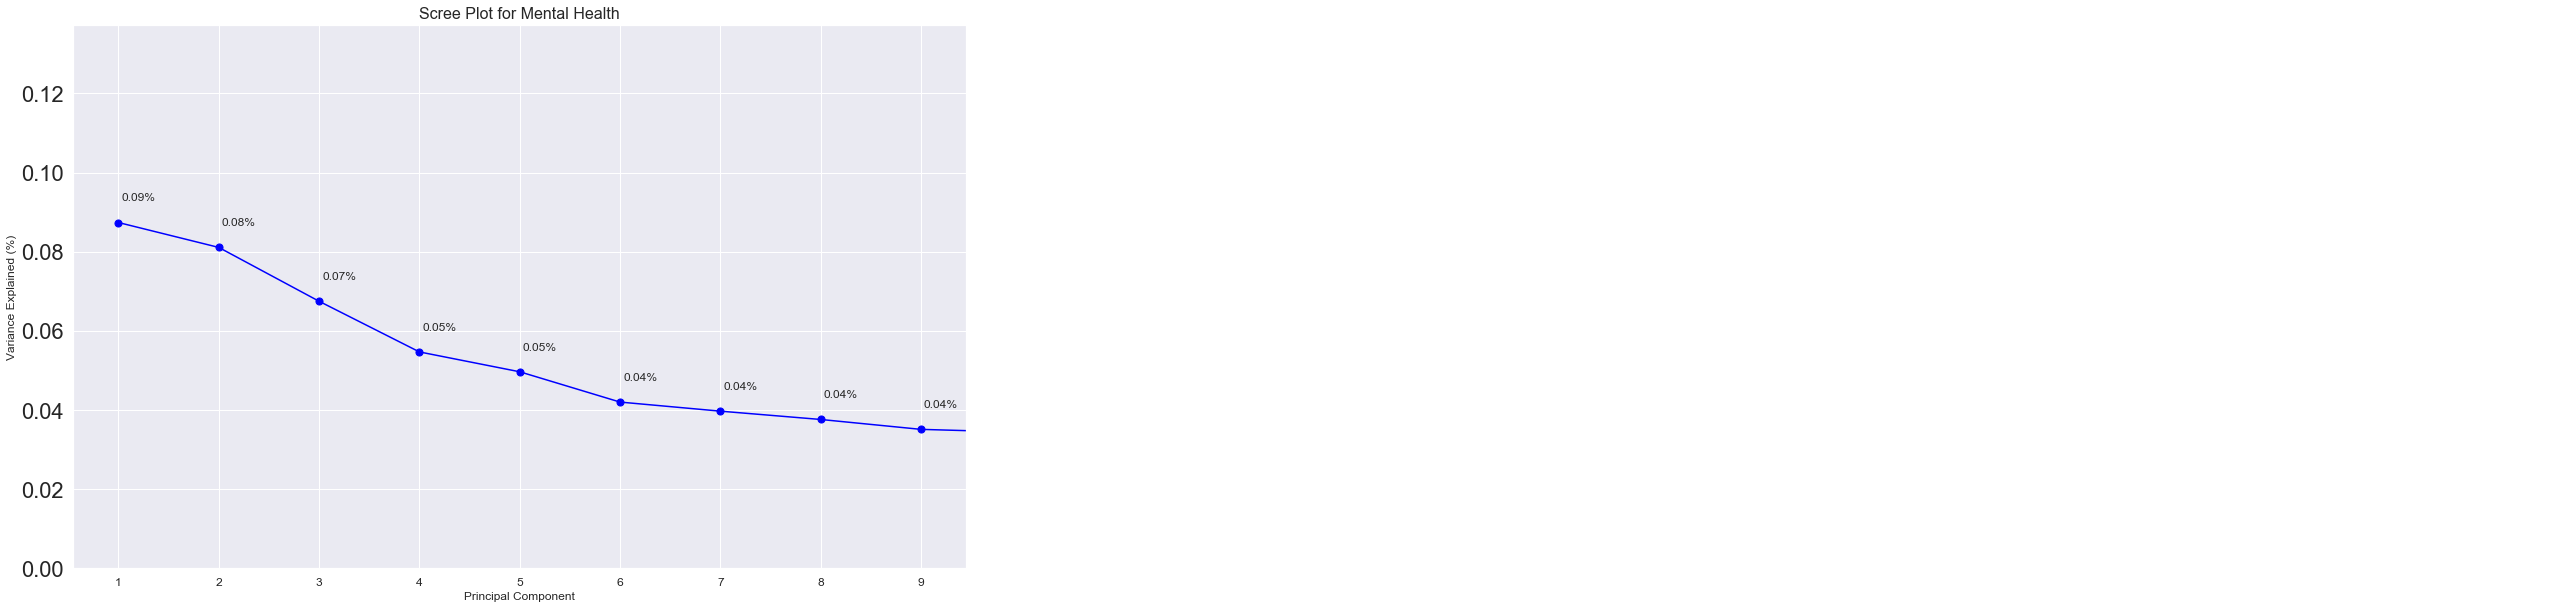

In [194]:
fig, ax = plt.subplots(figsize=(16,10))
scree_plot(ax, pca, title="Scree Plot for Mental Health")

In [195]:
color = target_df.values
color = color.reshape

In [196]:
pca = decomposition.PCA(n_components=34)
X_pca = pca.fit_transform(X_centered)

In [197]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

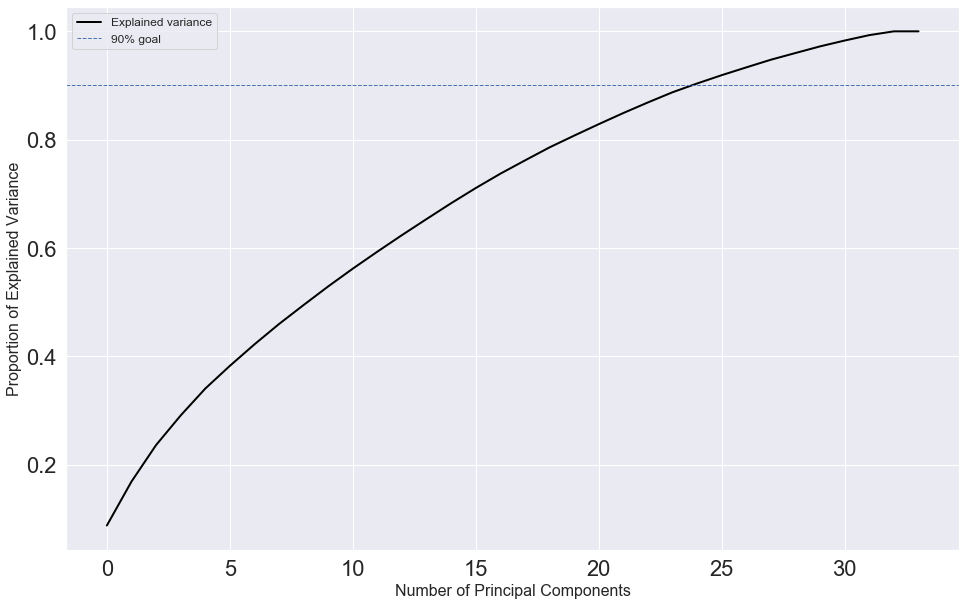

In [198]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(prop_var_expl, color = 'black', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', linewidth=1)
ax.set_ylabel('Proportion of Explained Variance',fontsize=16)
ax.set_xlabel('Number of Principal Components',fontsize=16)
ax.legend(fontsize=12);

In [199]:
type(X_pca)

numpy.ndarray

In [200]:
# fig, ax = plt.subplots(1, 1, figsize=(16, 10))
# ax.scatter(X_pca[:, 0], X_pca[:, 1], cmap=plt.cm.Set1, c=color, edgecolor='k', s=40)
# ax.set_title("First two PCA directions")
# ax.set_xlabel("1st eigenvector (PC1)")
# ax.set_ylabel("2nd eigenvector (PC2)");

In [201]:
# for col in mental_df.columns: 
#     fig, ax = plt.subplots(20, 20, figsize=(16, 10))
#     ax.scatter(mental_df[col].values, target_df)
#     ax.set_title("col vs instance of mental health ")
#     ax.set_xlabel("col")
#     ax.set_ylabel("instance of mental health");
#     plt.show()

KeyError: 'species'

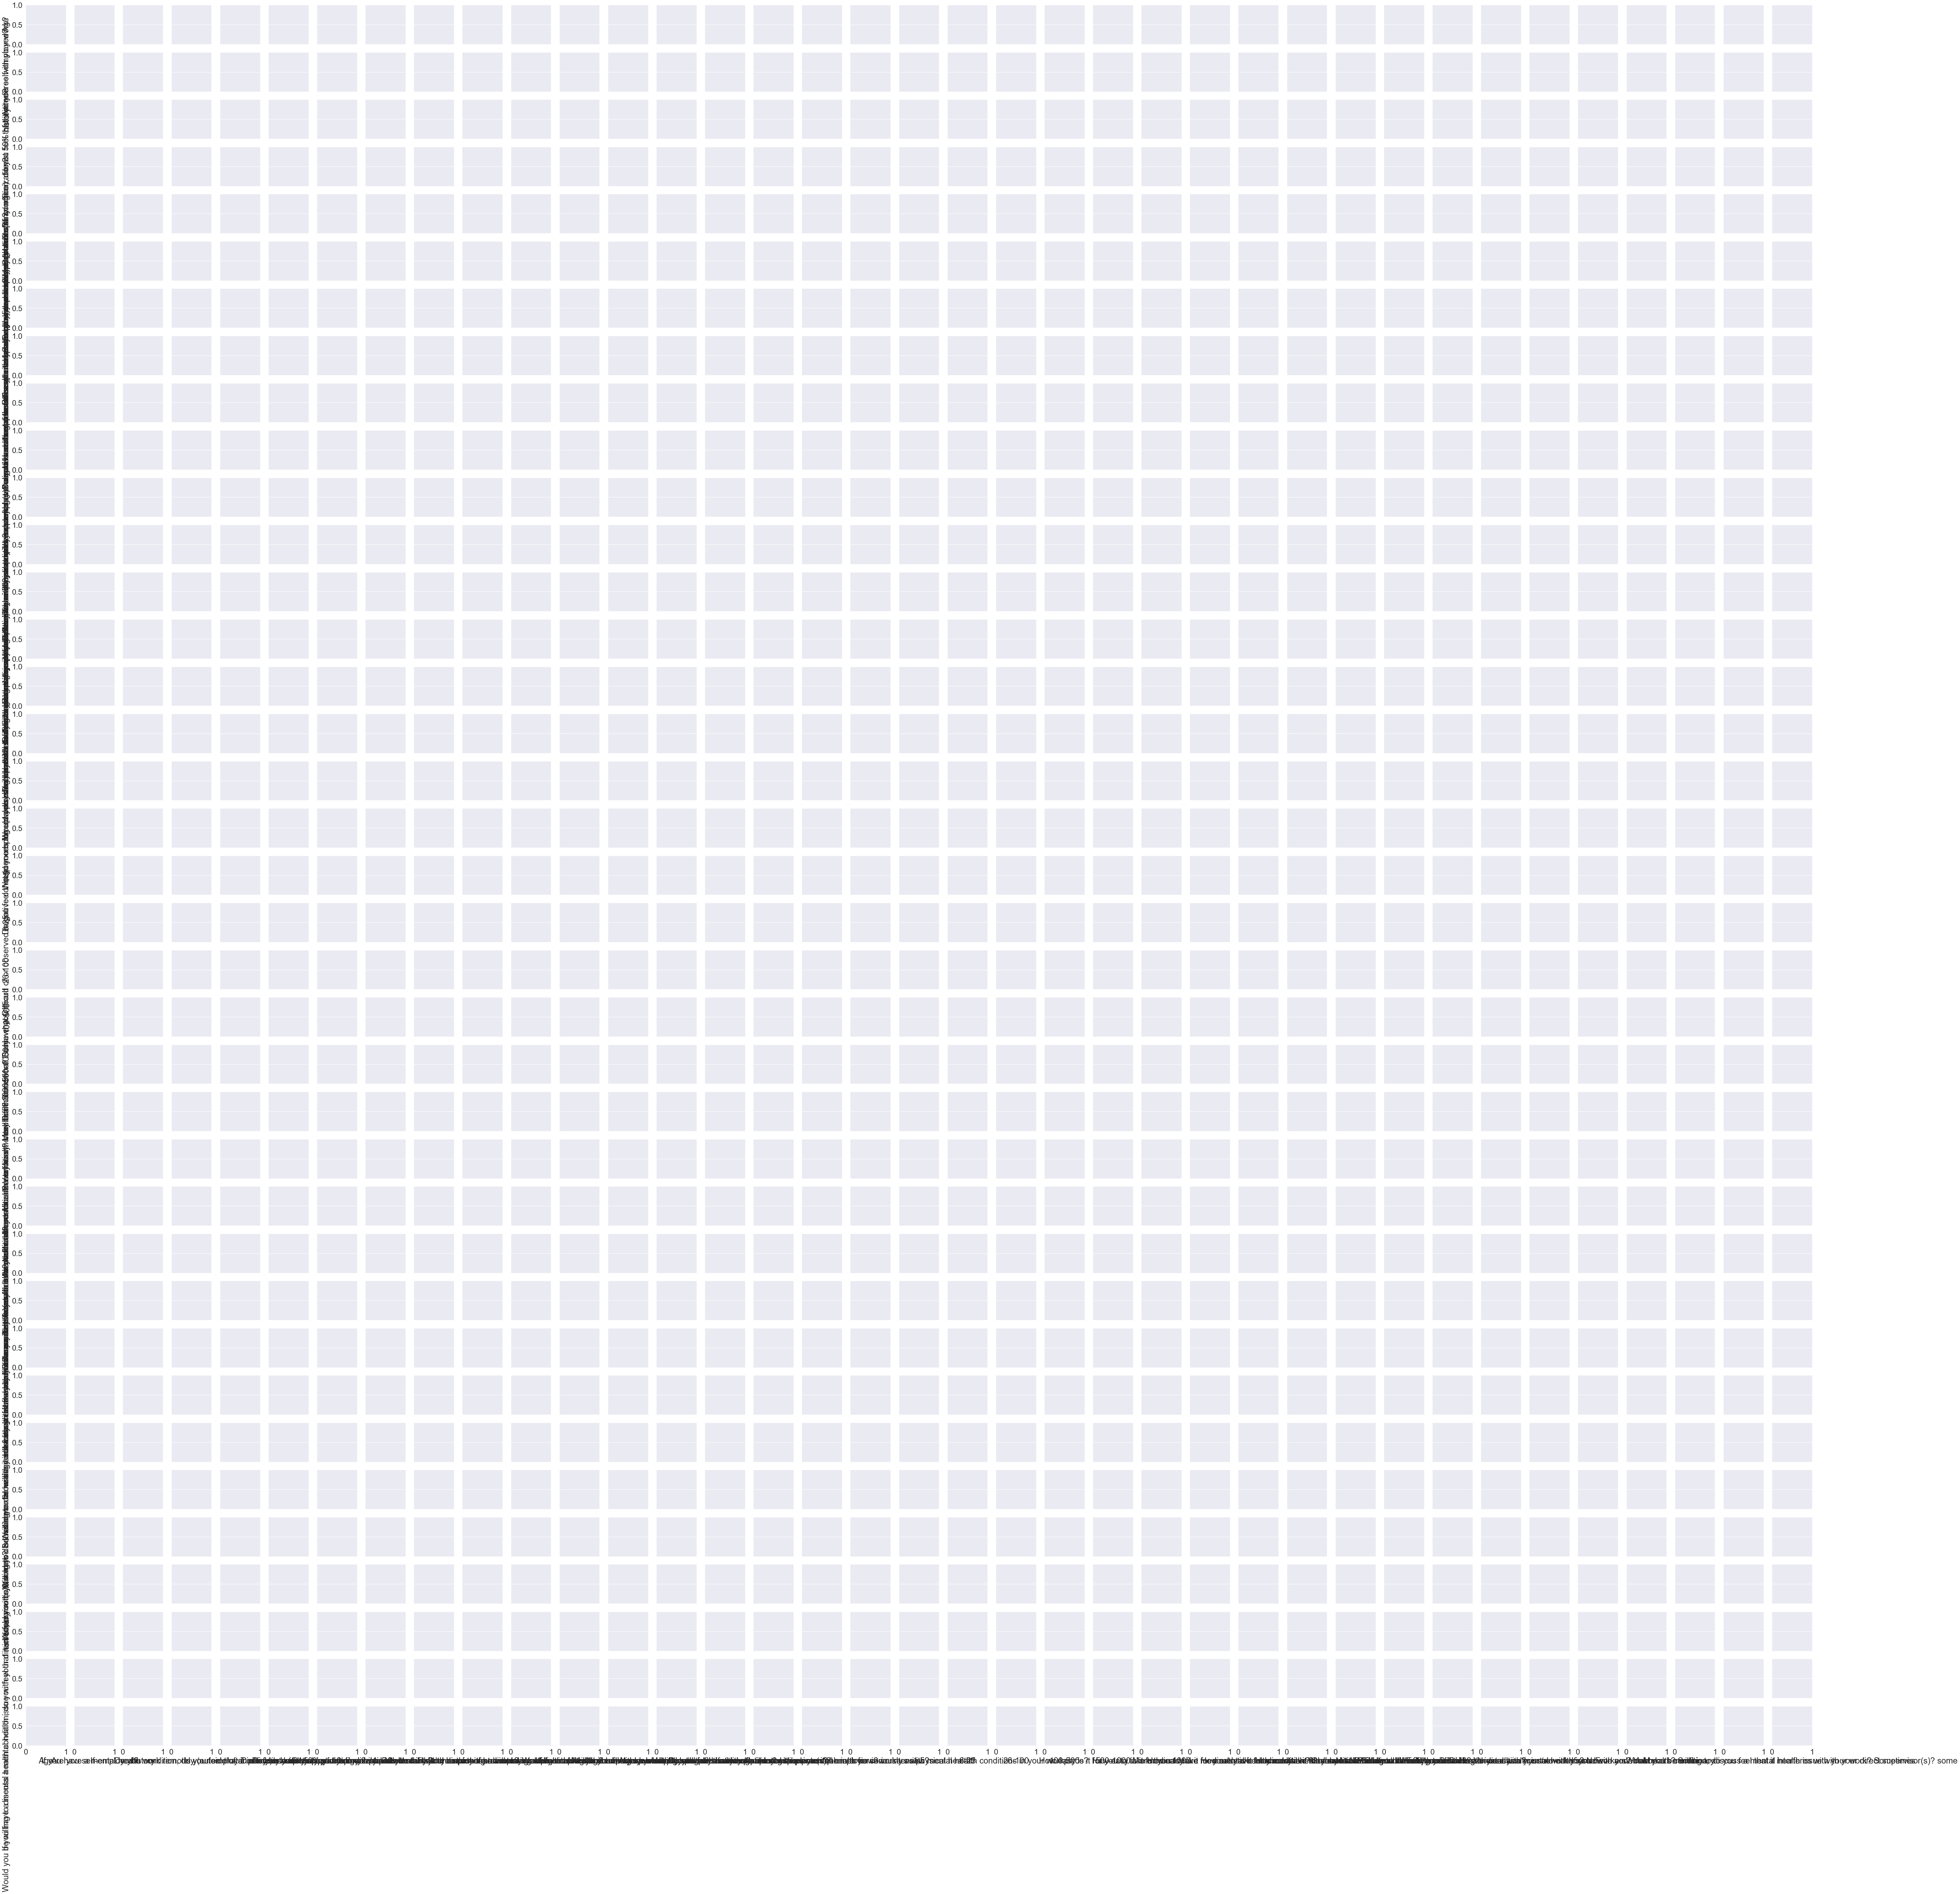

In [202]:
g = sns.pairplot(mental_df, hue="species", palette="husl")

In [203]:
mental_df['treatment'] = target_df

In [ ]:
#g = sns.pairplot(mental_df, palette="husl")
#print(g)

In [ ]:
#g = sns.pairplot(mental_df)

In [ ]:
# plt.figure(figsize=(100,100))
# pd.plotting.scatter_matrix(mental_df)
# plt.show()

In [ ]:
X_data = Z.values
X_data = X_data[:,:23]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, target_df.values, test_size=0.33, random_state=42)

In [ ]:
model = LogisticRegression(random_state=0 ).fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
precision = metrics.precision_score(y_true=y_test, y_pred=y_pred)
recall = metrics.recall_score(y_true=y_test, y_pred=y_pred)
classification_report= metrics.classification_report(y_true=y_test, y_pred=y_pred)

print('accuracy: {:.3f}'.format(accuracy))
print('precision: {:.3f}'.format(precision))
print('recall: {:.3f}'.format(recall))
print('=========================================================')
print('classification_report: \n{}'.format(classification_report))

In [ ]:
bern = BernoulliNB()

In [ ]:
bern.fit(X_train,y_train)

In [ ]:
bern_score = bern.score(X_test,y_test)
bern_score

In [ ]:
y_hat = bern.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_hat)
precision = metrics.precision_score(y_true=y_test, y_pred=y_hat)
recall = metrics.recall_score(y_true=y_test, y_pred=y_hat)
classification_report= metrics.classification_report(y_true=y_test, y_pred=y_hat)

print('accuracy: {:.3f}'.format(accuracy))
print('precision: {:.3f}'.format(precision))
print('recall: {:.3f}'.format(recall))
print('=========================================================')
print('classification_report: \n{}'.format(classification_report))

In [ ]:
mental_df.to_csv('data/cleaned_data.csv')

In [ ]:
target_df.to_csv('data/target_data.csv',header = True)

In [204]:
target_df.head()

0    1
1    0
2    0
3    1
4    0
Name: treatment, dtype: int64

In [205]:
mental_df.head()

,Age,Are you self-employed?,history,"If you have a mental health condition, do you feel that it interferes with your work?",Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,Do you know the options for mental health care your employer provides?,Has your employer ever discussed mental health as part of an employee wellness program?,Does your employer provide resources to learn more about mental health issues and how to seek help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,1-5,6-25,26-100,100-500,500-1000,More than 1000,How easy is it for you to take medical leave for a mental health condition? Somewhat Difficult,How easy is it for you to take medical leave for a mental health condition? Somewhat Easy,How easy is it for you to take medical leave for a mental health condition? Very Difficult,How easy is it for you to take medical leave for a mental health condition? Very easy,How easy is it for you to take medical leave for a mental health condition? yes/no,Would you be willing to discuss a mental health issue with your coworkers? No,Would you be willing to discuss a mental health issue with your coworkers? Yes,Would you be willing to discuss a mental health issue with your coworkers? Some,F,M,non-binary,"If you have a mental health condition, do you feel that it interferes with your work? Sometimes",Would you be willing to discuss a mental health issue with your direct supervisor(s)? some,treatment
0,37,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
1,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0
2,32,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,31,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
4,31,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


In [ ]:
sns.boxplot(mental_df['Do you work remotely (outside of an office) at least 50% of the time?'],target_df)

In [ ]:
target_df.head()

In [220]:
def boxplot(col, target_df,name):
  fig,ax = plt.subplots(figsize=(16,6))
  sns.boxplot(y=target_df,x=mental_df[col],orient='h')
  plt.ylabel('Mental Health',fontsize=16)
  plt.xlabel(name,fontsize=16)
  plt.xlim(0,2);

In [ ]:
for col in columns:
    boxplot(col, target_df, col)

In [ ]:
# boxplot('How easy is it for you to take medical leave for a mental health condition? Very easy', target_df, 'How easy is it for you to take medical leave for a mental health condition? Very easy')

In [ ]:
# boxplot('How easy is it for you to take medical leave for a mental health condition? Somewhat Difficult',target_df,'How easy is it for you to take medical leave for a mental health condition? Somewhat Difficult')

In [ ]:
fig,ax = plt.subplots(figsize=(16,6))
sns.boxplot(y=target_df,x=mental_df['Age'],orient='h')
plt.ylabel('Mental Health',fontsize=16)
plt.xlabel('Age',fontsize=16)


In [ ]:
boxplot('Does your employer provide resources to learn more about mental health issues and how to seek help?',target_df,'Does your employer provide resources to learn more about mental health issues and how to seek help?')

In [ ]:
boxplot('Do you know the options for mental health care your employer provides?',target_df, 'Do you know the options for mental health care your employer provides?')

In [ ]:
col = ['Ag']

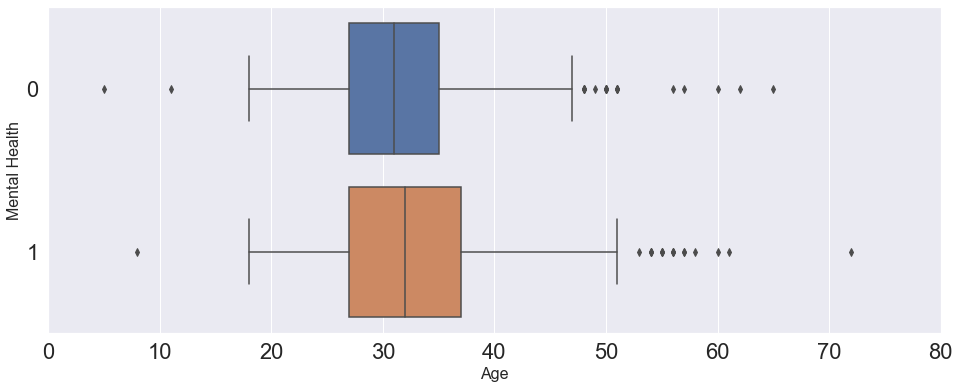

In [216]:
boxplot('Age',target_df,'Age')

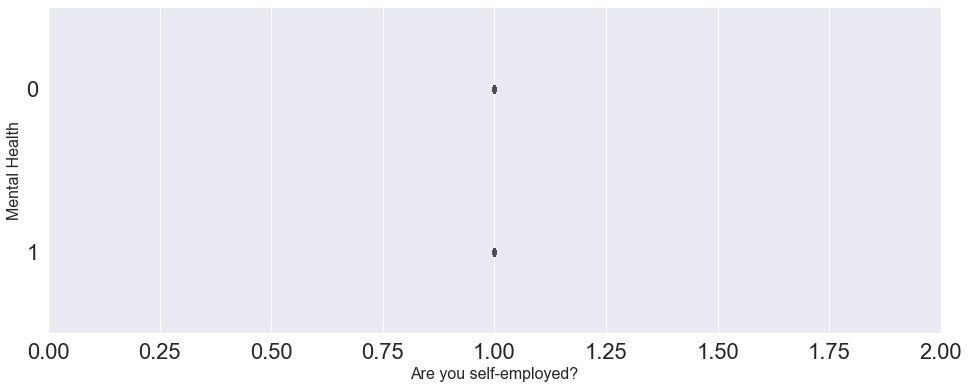

In [221]:
boxplot('Are you self-employed?', target_df, 'Are you self-employed?')

In [222]:
mental_df.head()

,Age,Are you self-employed?,history,"If you have a mental health condition, do you feel that it interferes with your work?",Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,Do you know the options for mental health care your employer provides?,Has your employer ever discussed mental health as part of an employee wellness program?,Does your employer provide resources to learn more about mental health issues and how to seek help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,1-5,6-25,26-100,100-500,500-1000,More than 1000,How easy is it for you to take medical leave for a mental health condition? Somewhat Difficult,How easy is it for you to take medical leave for a mental health condition? Somewhat Easy,How easy is it for you to take medical leave for a mental health condition? Very Difficult,How easy is it for you to take medical leave for a mental health condition? Very easy,How easy is it for you to take medical leave for a mental health condition? yes/no,Would you be willing to discuss a mental health issue with your coworkers? No,Would you be willing to discuss a mental health issue with your coworkers? Yes,Would you be willing to discuss a mental health issue with your coworkers? Some,F,M,non-binary,"If you have a mental health condition, do you feel that it interferes with your work? Sometimes",Would you be willing to discuss a mental health issue with your direct supervisor(s)? some,treatment
0,37,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
1,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0
2,32,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,31,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
4,31,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
